<a href="https://colab.research.google.com/github/AtharvaSC03/ML-Projects/blob/main/12_Air_Quality_Index_(AQI)_Prediction_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetch Weather Data

In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
API_KEY = '8d80127bf44a9b0555ac0e7193671d29'
BASE_URL = 'https://api.openweathermap.org/data/2.5/weather'

In [11]:
def get_weather(city, api_key):
    params = {'q': city, 'appid': api_key, 'units': 'metric'}
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    return data

In [17]:
get_weather('Mumbai', API_KEY)

{'coord': {'lon': 72.8479, 'lat': 19.0144},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 27.09,
  'feels_like': 30.24,
  'temp_min': 27.09,
  'temp_max': 27.09,
  'pressure': 1007,
  'humidity': 83,
  'sea_level': 1007,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 8.53, 'deg': 235, 'gust': 10.83},
 'clouds': {'all': 94},
 'dt': 1755870087,
 'sys': {'country': 'IN', 'sunrise': 1755823898, 'sunset': 1755869510},
 'timezone': 19800,
 'id': 1275339,
 'name': 'Mumbai',
 'cod': 200}

In [15]:
data = get_weather('Mumbai', API_KEY)

In [16]:
print("Current Temperature:", data["main"]["temp"], "°C")
print("Weather Condition:", data["weather"][0]["description"])

Current Temperature: 27.09 °C
Weather Condition: overcast clouds


In [19]:
import requests

BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

def get_weather(city, api_key):
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'
    }
    try:
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()  # Raise error if status != 200
        data = response.json()

        # Extract important fields
        weather_info = {
            "city": data.get("name"),
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "description": data["weather"][0]["description"],
            "wind_speed": data["wind"]["speed"]
        }
        return weather_info

    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather: {e}")
        return None



In [20]:
weather = get_weather(city, API_KEY)

if weather:
    print(f"Weather in {weather['city']}: {weather['description']}")
    print(f"🌡 Temp: {weather['temperature']}°C | 💧 Humidity: {weather['humidity']}% | 🌬 Wind: {weather['wind_speed']} m/s")

Weather in Mumbai: overcast clouds
🌡 Temp: 27.09°C | 💧 Humidity: 83% | 🌬 Wind: 8.53 m/s


Proper Usage

In [21]:
# !pip install plotly dash -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.9 MB/s eta 0:00:00


In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import output

In [23]:
# Base URL for OpenWeatherMap API
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

# Function to fetch weather data
def get_weather(city, api_key):
    params = {'q': city, 'appid': api_key, 'units': 'metric'}
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    return data

In [24]:
API_KEY = '8d80127bf44a9b0555ac0e7193671d29'   # replace with your OpenWeatherMap API Key
cities = ["Mumbai", "Delhi", "London", "New York", "Tokyo"]

In [25]:
weather_data = []
for city in cities:
    data = get_weather(city, API_KEY)
    if data.get("main"):
        weather_data.append({
            "City": city,
            "Temperature (°C)": data["main"]["temp"],
            "Feels Like (°C)": data["main"]["feels_like"],
            "Humidity (%)": data["main"]["humidity"],
            "Pressure (hPa)": data["main"]["pressure"],
            "Weather": data["weather"][0]["description"]
        })

df = pd.DataFrame(weather_data)
print(df)

       City  Temperature (°C)  Feels Like (°C)  Humidity (%)  Pressure (hPa)  \
0    Mumbai             27.09            30.24            83            1007   
1     Delhi             31.59            38.59            70             998   
2    London             22.19            21.46            38            1020   
3  New York             20.97            20.43            50            1016   
4     Tokyo             28.98            32.87            71            1011   

           Weather  
0  overcast clouds  
1  overcast clouds  
2    broken clouds  
3        clear sky  
4  overcast clouds  


/tmp/ipython-input-3990851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Temperature (°C)", data=df, palette="coolwarm")


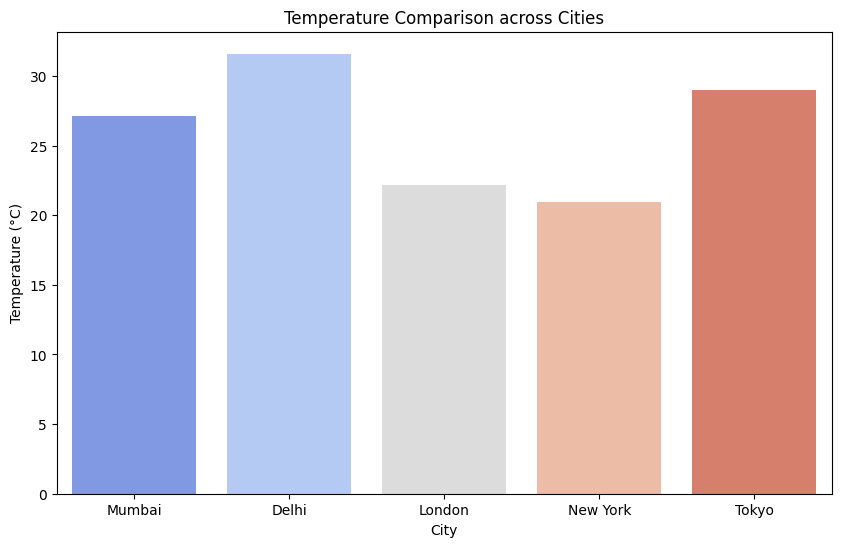

In [26]:
# --- Visualization 1: Temperature Comparison ---
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="Temperature (°C)", data=df, palette="coolwarm")
plt.title("Temperature Comparison across Cities")
plt.show()

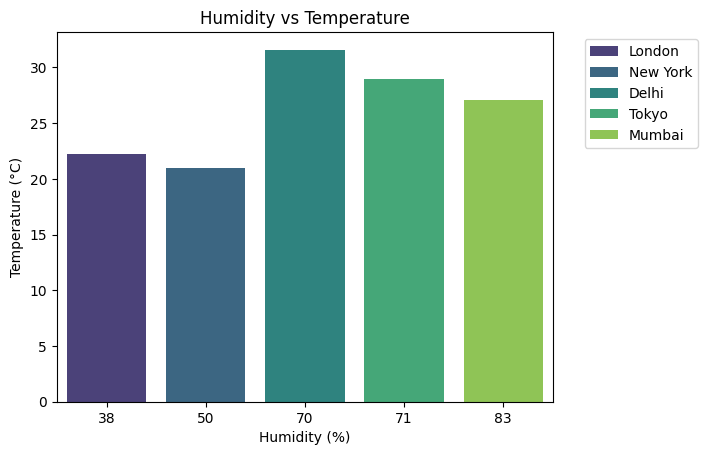

In [30]:
# --- Visualization 2: Humidity vs Temperature ---
sns.barplot(x="Humidity (%)", y="Temperature (°C)", data=df, palette="viridis", hue = 'City')
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.title("Humidity vs Temperature")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

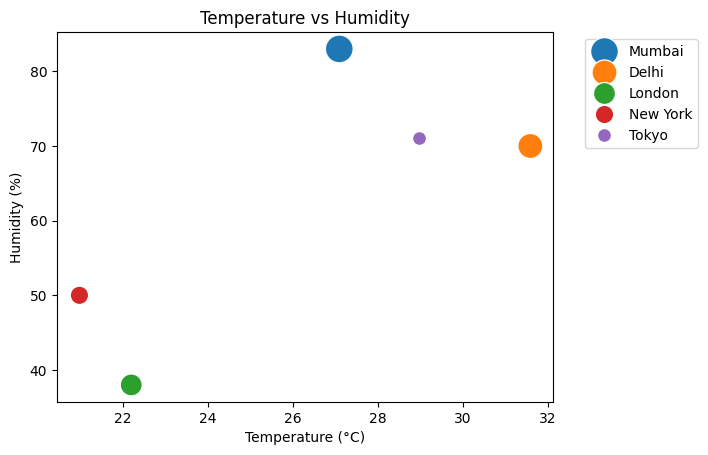

In [33]:
sns.scatterplot(x="Temperature (°C)", y="Humidity (%)", data=df, hue="City", size="City", sizes=(100, 400))
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Temperature vs Humidity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [34]:
# --- Interactive Dashboard with Plotly ---
fig = px.bar(df, x="City", y="Temperature (°C)", color="City", title="Temperature Comparison across Cities")
fig.show()

In [35]:
fig2 = px.scatter(df, x="Temperature (°C)", y="Humidity (%)",
                  color="City", size="Pressure (hPa)",
                  hover_data=["Feels Like (°C)", "Weather"],
                  title="Interactive Weather Analysis")
fig2.show()